<a href="https://colab.research.google.com/github/Ramadhan2008-2008/folium_project_n3ts/blob/main/Audric_maccrea_arve_basuki__X_2_Surakarta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Template Tugas Project

1. import folium, pandas, geopandas, dan drive.
2. load data shapefile, pilih kota/kabupaten yang akan dianalisis
3. load data csv dan proses merge/join data
4. load peta choropleth

In [ ]:
# Import Library

import folium
import pandas as pd
import geopandas as gpd
from google.colab import drive

Pilih nama kota / kabupaten kalian. jika tidak muncul pastikan namanya sesuai dengan nama di link berikut :
https://geoservices.big.go.id/portal/apps/webappviewer/index.html?id=cb58db080712468cb4bfd408dbde3d70

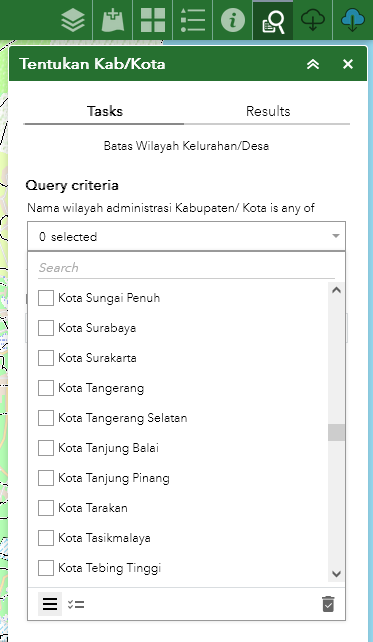

In [ ]:
# Read Data Shapefile

drive.mount('/content/drive')

# Shapefile Admin Indonesia (tidak usah diubah2) Warning! File besar 1.4gb
indonesia_admin = gpd.read_file('/content/drive/MyDrive/ADMIN_INDO/ADMINISTRASI_AR_DESAKEL_10K.shp')

# Pilih Kota/Kabupaten yang ingin ditampilkan, contoh 'Kota Tangerang Selatan'
aoi_admin = indonesia_admin[indonesia_admin['WADMKK'] == 'Kota Surakarta']

Mounted at /content/drive


In [ ]:
# CSV file path
csv_path = 'data_surakarta new .csv'

# Read shapefile
admin_gdf = aoi_admin

# Read CSV data
csv_data = pd.read_csv(csv_path, delimiter=';')

print(csv_data.head())
print(admin_gdf.head())
# Convert column names to lowercase
csv_data['Kelurahan'] = csv_data['Kelurahan'].str.lower().str.replace(' ', '')
admin_gdf['NAMOBJ'] = admin_gdf['NAMOBJ'].str.lower().str.replace(' ', '')
#csv_data['jumlah penduduk (jiwa)'] = csv_data['Jumlah penduduk (jiwa)'].astype(str).str.replace('.', '')
#csv_data['Jumlah Penduduk'] = pd.to_numeric(csv_data['Jumlah Penduduk'])

# Fix typo to merge properly
#admin_gdf['NAMOBJ'] = admin_gdf['NAMOBJ'].str.replace('Husein Sastranegara ', 'HUSEN SASTRANEGARA')
#csv_data['Kelurahan'] = csv_data['Kelurahan'].str.replace('perigibaru', 'parigibaru')

# Merge data
merged_data = pd.merge(admin_gdf, csv_data, left_on='NAMOBJ', right_on='Kelurahan', how='left')

# Convert to GeoDataFrame
merged_gdf = gpd.GeoDataFrame(merged_data, geometry=merged_data.geometry)

print(merged_gdf.head())
# Now you can use merged_gdf for further analysis and visualization

   Kelurahan  Jumlah Penduduk
0     Pajang            25904
1    Laweyan             2109
2       Bumi             6352
3  Panularan             9696
4  Penumping             3937
      OBJECTID      NAMOBJ       FCODE REMARK  \
8234    8235.0    Kadipiro  BA03070040   None   
8235    8236.0   Baluwarti  BA03070040   None   
8236    8237.0  Banjarsari  BA03070040   None   
8237    8238.0  Banyuanyar  BA03070040   None   
8238    8239.0        Bumi  BA03070040   None   

                                          METADATA     SRS_ID KDBBPS KDCBPS  \
8234  TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN  SRGI 2013   None   None   
8235  TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN  SRGI 2013   None   None   
8236  TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN  SRGI 2013   None   None   
8237  TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN  SRGI 2013   None   None   
8238  TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN  SRGI 2013   None   None   

        KDCPUM KDEBPS  ...          WADMKK       W

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
# Create a base map
m = folium.Map(location=[-7.5747613445364825, 110.82459136022572], zoom_start=11)

# Create a choropleth map
choropleth = folium.Choropleth(
    geo_data=merged_gdf,
    name='choropleth',
    data=merged_gdf,
    columns=["Kelurahan", "Jumlah Penduduk"],
    key_on= "feature.properties.NAMOBJ",
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name="Jumlah Penduduk"
).add_to(m)

jumlah_KK = folium.GeoJson(
    data=merged_gdf,
    name='Jumlah Penduduk',
    style_function=lambda feature: {'fillOpacity': 0, 'color': 'transparent'},
    popup = folium.GeoJsonPopup(
        fields=['WADMKD','Jumlah Penduduk'],
        aliases=['Kelurahan','Jumlah Penduduk']
    )
).add_to(choropleth)

folium.LayerControl().add_to(m)


m

In [ ]:
# Create a base map
m = folium.Map(location=[-7.5747613445364825, 110.82459136022572], zoom_start=13)

# Create a choropleth map
choropleth = folium.Choropleth(
    geo_data=merged_gdf,
    name='choropleth',
    data=merged_gdf,
    columns=["Kelurahan", "Jumlah Penduduk"],
    key_on= "feature.properties.NAMOBJ",
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name="Jumlah Penduduk"
).add_to(m)

# Create/import data sma
data_sma = pd.read_csv('sma surakarta revisi.csv')

data_sma['geometry'] = gpd.GeoSeries.from_wkt(data_sma['WKT'])

# Extract latitude and longitude from Point geometries
data_sma['latitude'] = data_sma['geometry'].apply(lambda x: x.y)
data_sma['longitude'] = data_sma['geometry'].apply(lambda x: x.x)

# Add markers to the map
# Create a marker layer
marker_layer = folium.FeatureGroup(name="SMA SURAKARTA")

# Add markers to the layer
for i in range(0, len(data_sma)):
    folium.Marker([data_sma.iloc[i]['latitude'], data_sma.iloc[i]['longitude']], popup=data_sma.iloc[i]['nama']).add_to(marker_layer)

m.add_child(marker_layer)

# Add Jumlah_KK layer map
jumlah_KK = folium.GeoJson(
    data=merged_gdf,
    name='Jumlah_Penduduk',
    style_function=lambda feature: {'fillOpacity': 0, 'color': 'transparent'},
    popup = folium.GeoJsonPopup(
        fields=['WADMKD','Jumlah Penduduk'],
        aliases=['Kelurahan','Jumlah Penduduk']
    )
).add_to(choropleth)

folium.LayerControl().add_to(m)


m

Analysis Question:
Kelurahan mana yang memiliki jumlah KK dengan kelas tertinggi (Merah Tua)?

Jawab: Kelurahan Mojosongo

Kelurahan apa saja yang tidak terdapat Sekolah Negeri?

Jawab:
1. Kelurahan Pajang
2. Kelurahan Laweyan
3. Kelurahan Bumi
4. Kelurahan Penumping
5. Kelurahan Sriwedari
6. Kelurahan Purwosari
7. Kelurahan Sondakan
8. Kelurahan Kerten
9. Kelurahan Jajar
10. Kelurahan Karangasem
11. Kelurahan Joyotakan
12. Kelurahan Danukusuman
13. Kelurahan Serengan
14. Kelurahan Tipes  
15. Kelurahan Jayengan
16. Kelurahan Kemlayan
17. Kelurahan Joyosuran
18. Kelurahan Semanggi
19. Kelurahan Pasarkliwon
20. Kelurahan Gajahan
21. Kelurahan Baluwarti
22. Kelurahan Kampungbaru
23. Kelurahan Kedunglumbu
24. Kelurahan Sangkrah
25. Kelurahan Kauman
26. Kelurahan Mojo
27. Kelurahan Sudiroprajan
28. Kelurahan Gandekan
29. Kelurahan Sewu
30. Kelurahan Pucangsawit
31. Kelurahan Jagalan
32. Kelurahan Jebres  
33. Kelurahan Kadipiro
34. Kelurahan Setabelan
35. Kelurahan Kestalan
36. Kelurahan Keprabon
37. Kelurahan Timuran
38. Kelurahan Ketelan
39. Kelurahan Punggawan
40. Kelurahan Mangkubumen  
41. Kelurahan Sumber
42. Kelurahan Banyuanyar
43. Kelurahan Banjarsari
44. Kelurahan Joglo
45. Kelurahan Kepatihan Wetan
46. Kelurahan Kepatihan Kulon